In [4]:
import pandas as pd

In [11]:
df= pd.read_csv(r'C:\Users\supri\Downloads\UCI_Credit_Card.csv')

In [12]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.pipeline import Pipeline 
import pickle
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import logging
logging.basicConfig(level = logging.INFO, filename = 'app.log', filemode = 'w', format = '%(asctime)s - %(levelname)s - %(message)s')

In [29]:
df.shape

(30000, 25)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [31]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [32]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [33]:
df['defaulter_or_not'] =df ['default.payment.next.month']
df = df.drop('default.payment.next.month',axis = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_or_not
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<Axes: xlabel='defaulter_or_not', ylabel='count'>

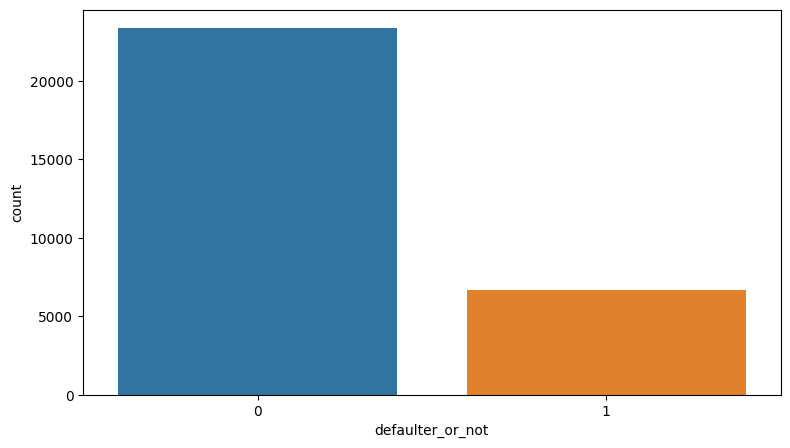

In [34]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'defaulter_or_not', data = df)

In [35]:
df['defaulter_or_not'].value_counts()

defaulter_or_not
0    23364
1     6636
Name: count, dtype: int64

In [36]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [37]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [38]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)

In [39]:
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [40]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [41]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [42]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [43]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['defaulter_or_not']

C:\Users\supri\AppData\Local\Temp\ipykernel_16284\2212811844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Defaulter'] = df['defaulter_or_not']


In [44]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 
3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

C:\Users\supri\AppData\Local\Temp\ipykernel_16284\3421992962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university',


<Figure size 1000x500 with 0 Axes>

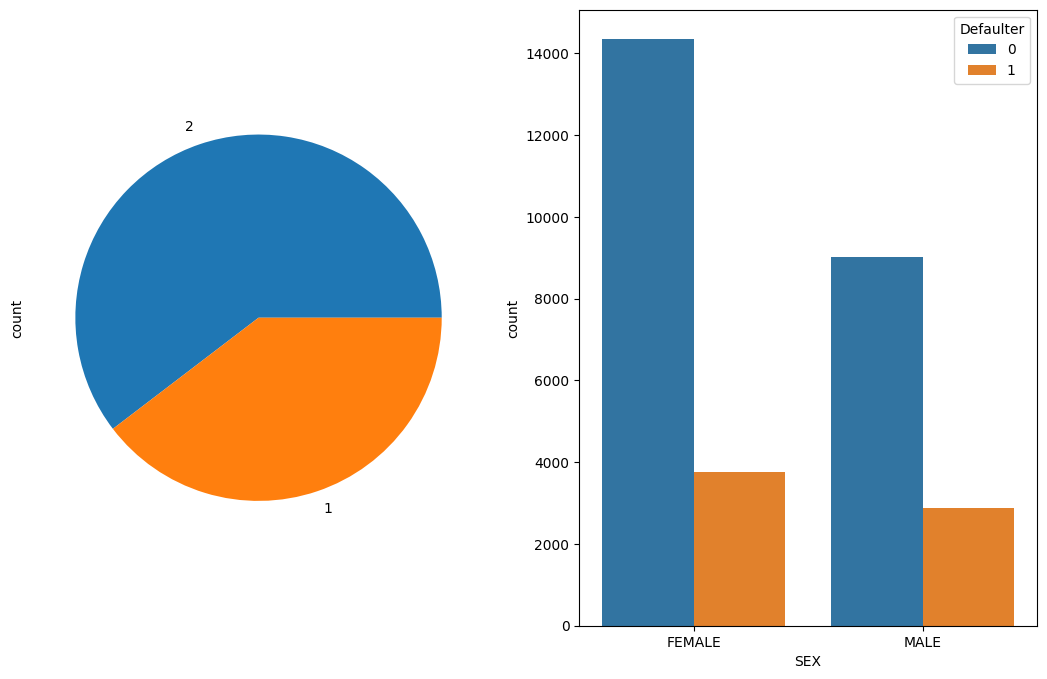

<Figure size 1000x500 with 0 Axes>

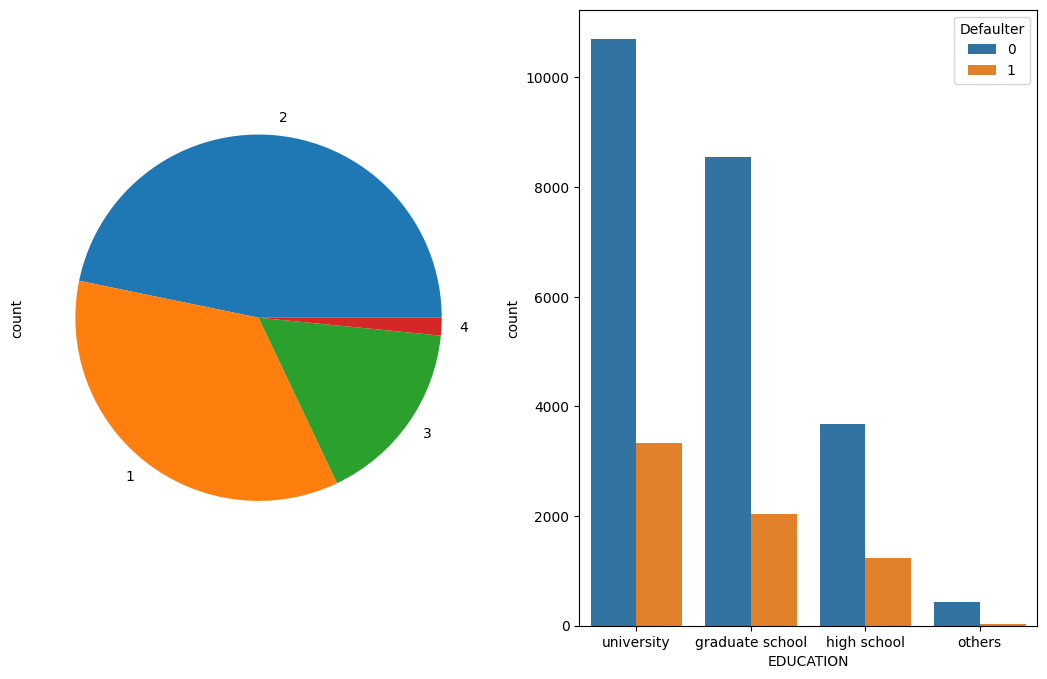

<Figure size 1000x500 with 0 Axes>

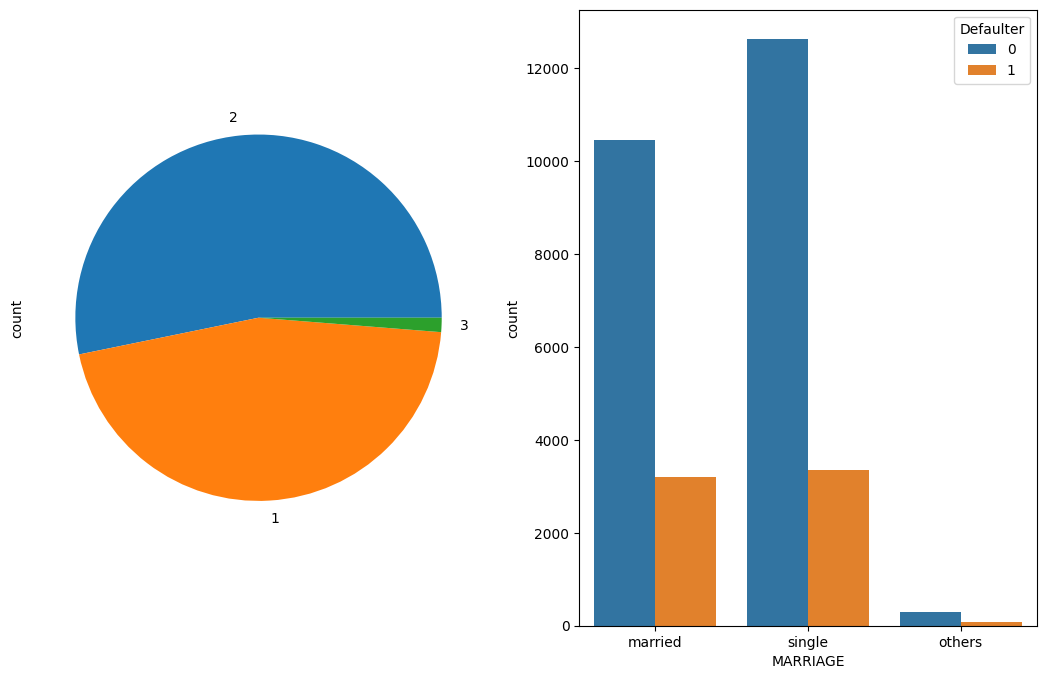

In [45]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

In [46]:
df['LIMIT_BAL'].max()

1000000.0

In [47]:
df['LIMIT_BAL'].min()

10000.0

In [48]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='defaulter_or_not', ylabel='LIMIT_BAL'>

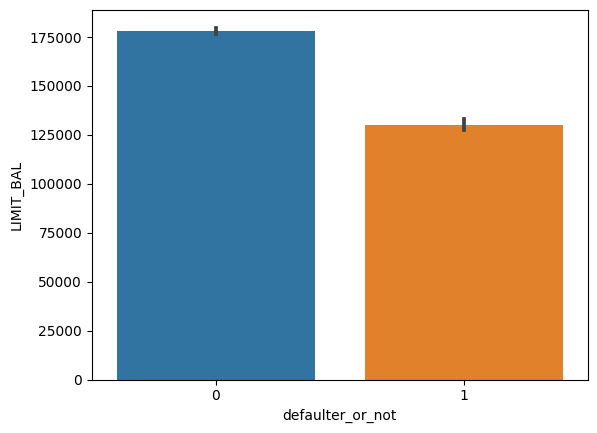

In [49]:
sns.barplot(x='defaulter_or_not', y='LIMIT_BAL', data=df)

<Figure size 1400x400 with 0 Axes>

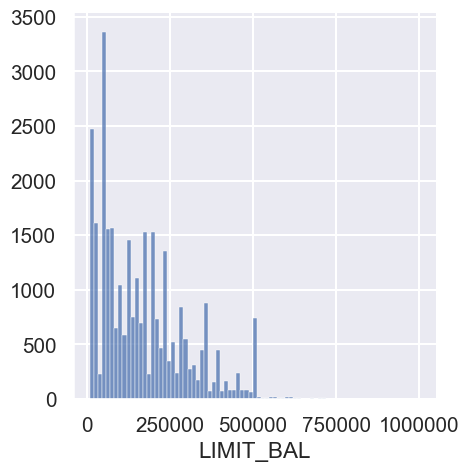

In [50]:
sns.set(rc={'figure.figsize' : (15,15)})
sns.set_context('talk',font_scale=0.9)
plt.figure(figsize=(14,4))
sns.displot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain',axis='x')
plt.ylabel('')
plt.show()

<Axes: >

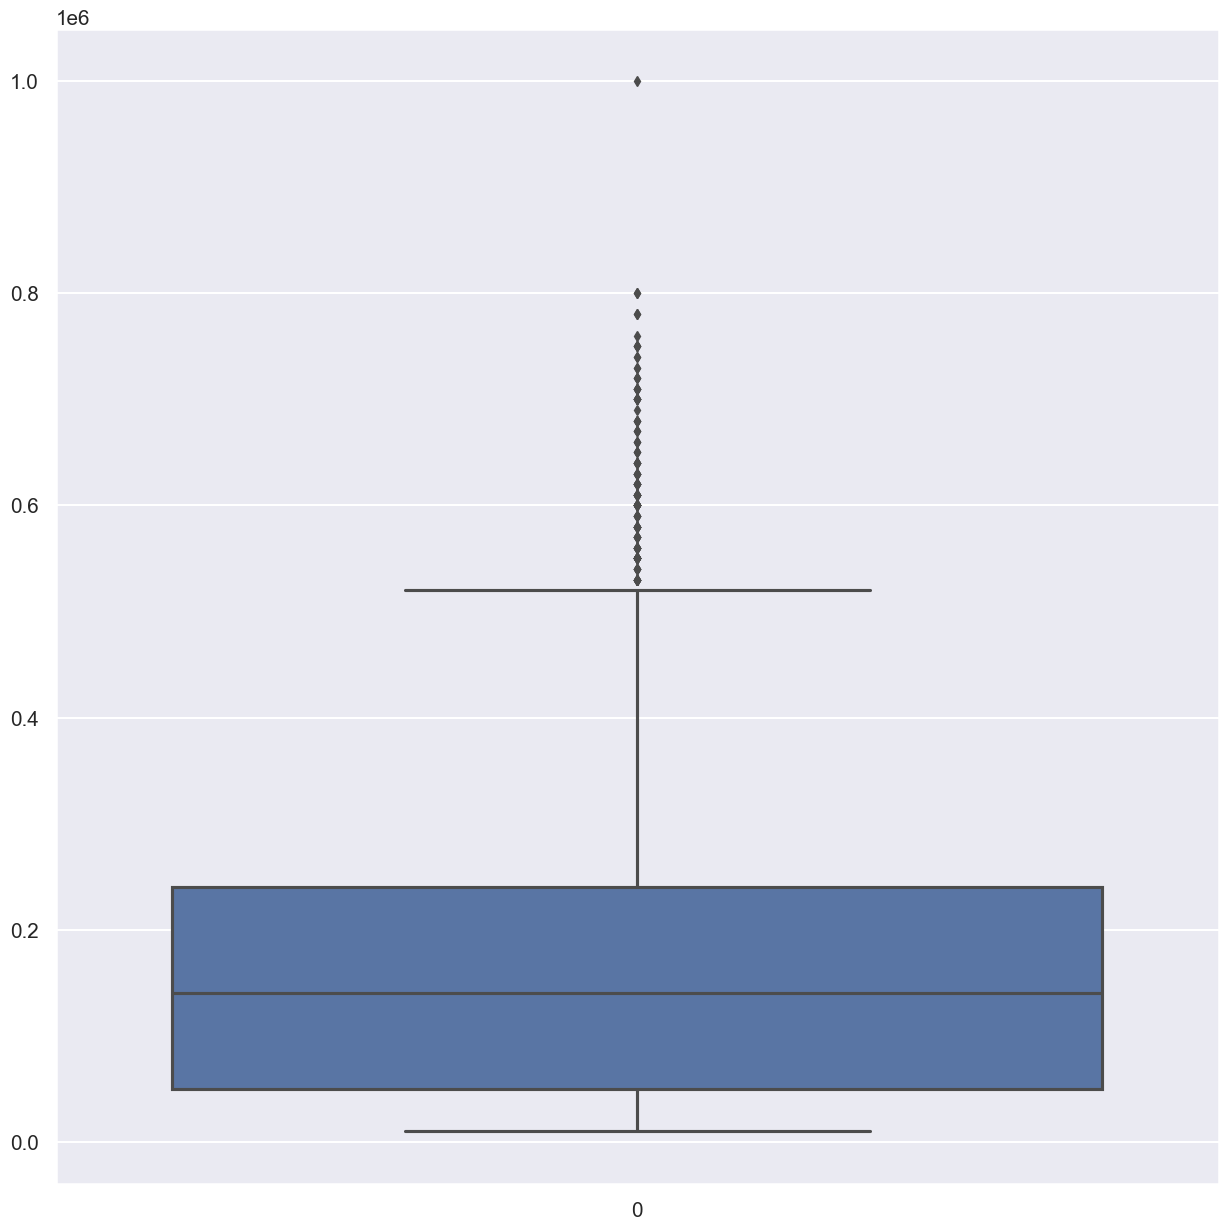

In [51]:
sns.boxplot(df["LIMIT_BAL"])

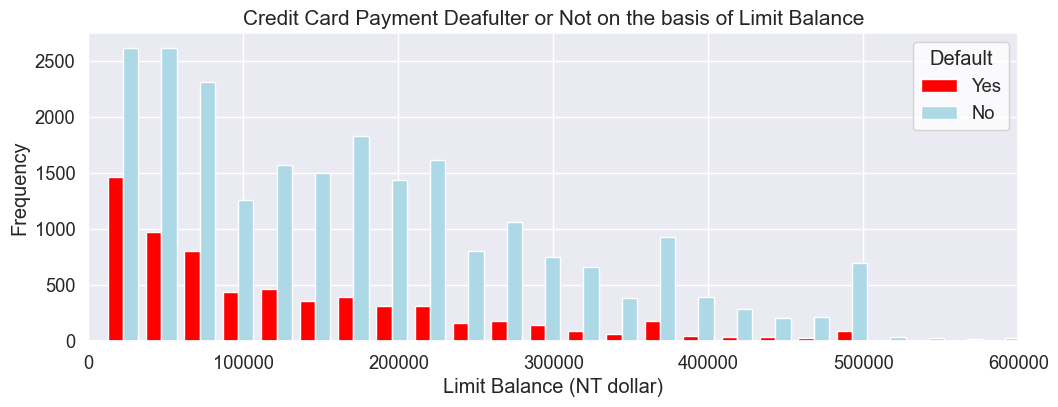

In [52]:
defaulter = list(df[df['defaulter_or_not'] == 1]['LIMIT_BAL'])
non_defaulter = list(df[df['defaulter_or_not'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
plt.hist([defaulter, non_defaulter], bins = 40, color=['red', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('Credit Card Payment Deafulter or Not on the basis of Limit Balance', size=15)
plt.show()
#plt.box(False)
#plt.savefig('ImageName', format='png', dpi=200, transparent=True)

In [53]:
df['bin_limit']=pd.cut(df['LIMIT_BAL'],bins=[10000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])

In [54]:
df['bin_limit'].value_counts()

bin_limit
(10000, 100000]      12005
(100000, 200000]      7880
(200000, 300000]      5059
(300000, 400000]      2759
(400000, 500000]      1598
(500000, 600000]       127
(600000, 700000]        56
(700000, 800000]        22
(900000, 1000000]        1
(800000, 900000]         0
Name: count, dtype: int64

In [55]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_or_not,bin_limit
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(10000, 100000]"
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(100000, 200000]"
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(10000, 100000]"
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(10000, 100000]"
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(10000, 100000]"


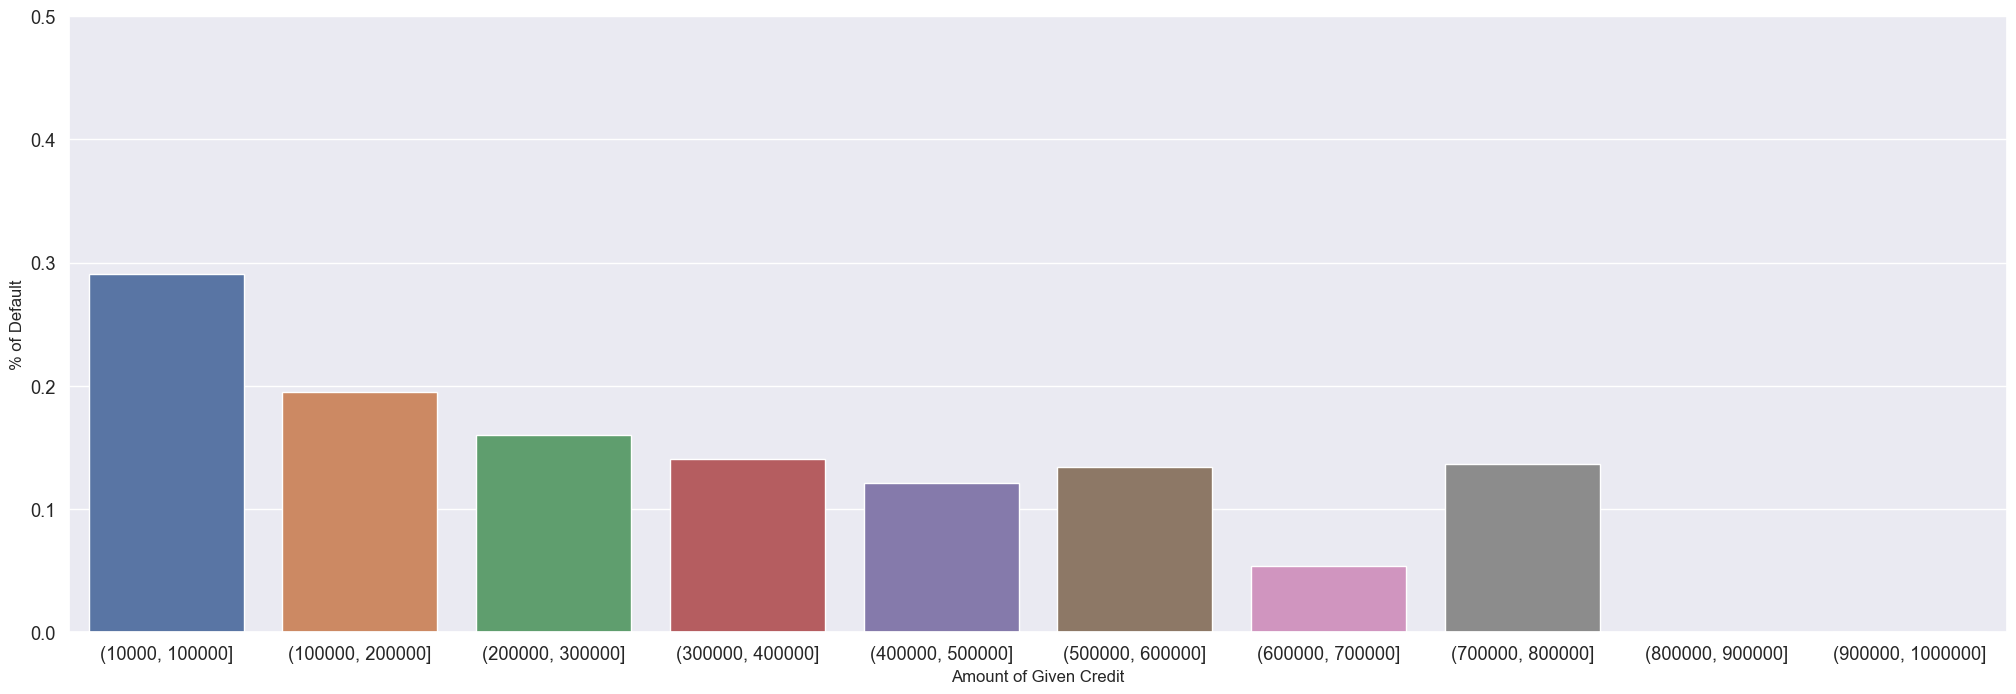

In [56]:
plt.figure(figsize=(25,8))
sns.barplot(x=df["bin_limit"],y=df["defaulter_or_not"]==1,ci = None)
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.show()

In [57]:
df['AGE'].min()

21

In [58]:
df['AGE'].max()

79

In [59]:
df['bin_age'] = pd.cut(df['AGE'],[15, 20,25, 30, 35, 40, 50, 60, 80])
print(df['bin_age'].value_counts())

bin_age
(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
(15, 20]       0
Name: count, dtype: int64


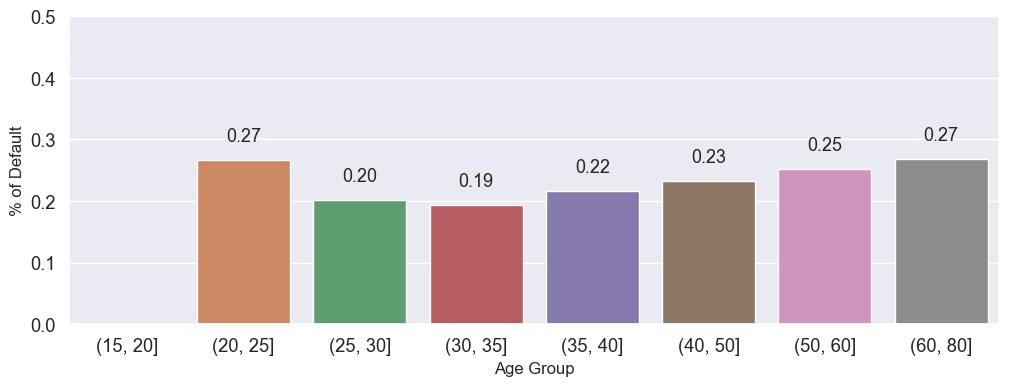

In [60]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = df["bin_age"], y = df["defaulter_or_not"]==1 , ci = None)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

In [61]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [62]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter_or_not,bin_limit,bin_age
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,"(200000, 300000]","(35, 40]"
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,"(100000, 200000]","(40, 50]"
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,"(10000, 100000]","(35, 40]"
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,"(10000, 100000]","(40, 50]"
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1,"(10000, 100000]","(40, 50]"


In [63]:
bill_amnt_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]

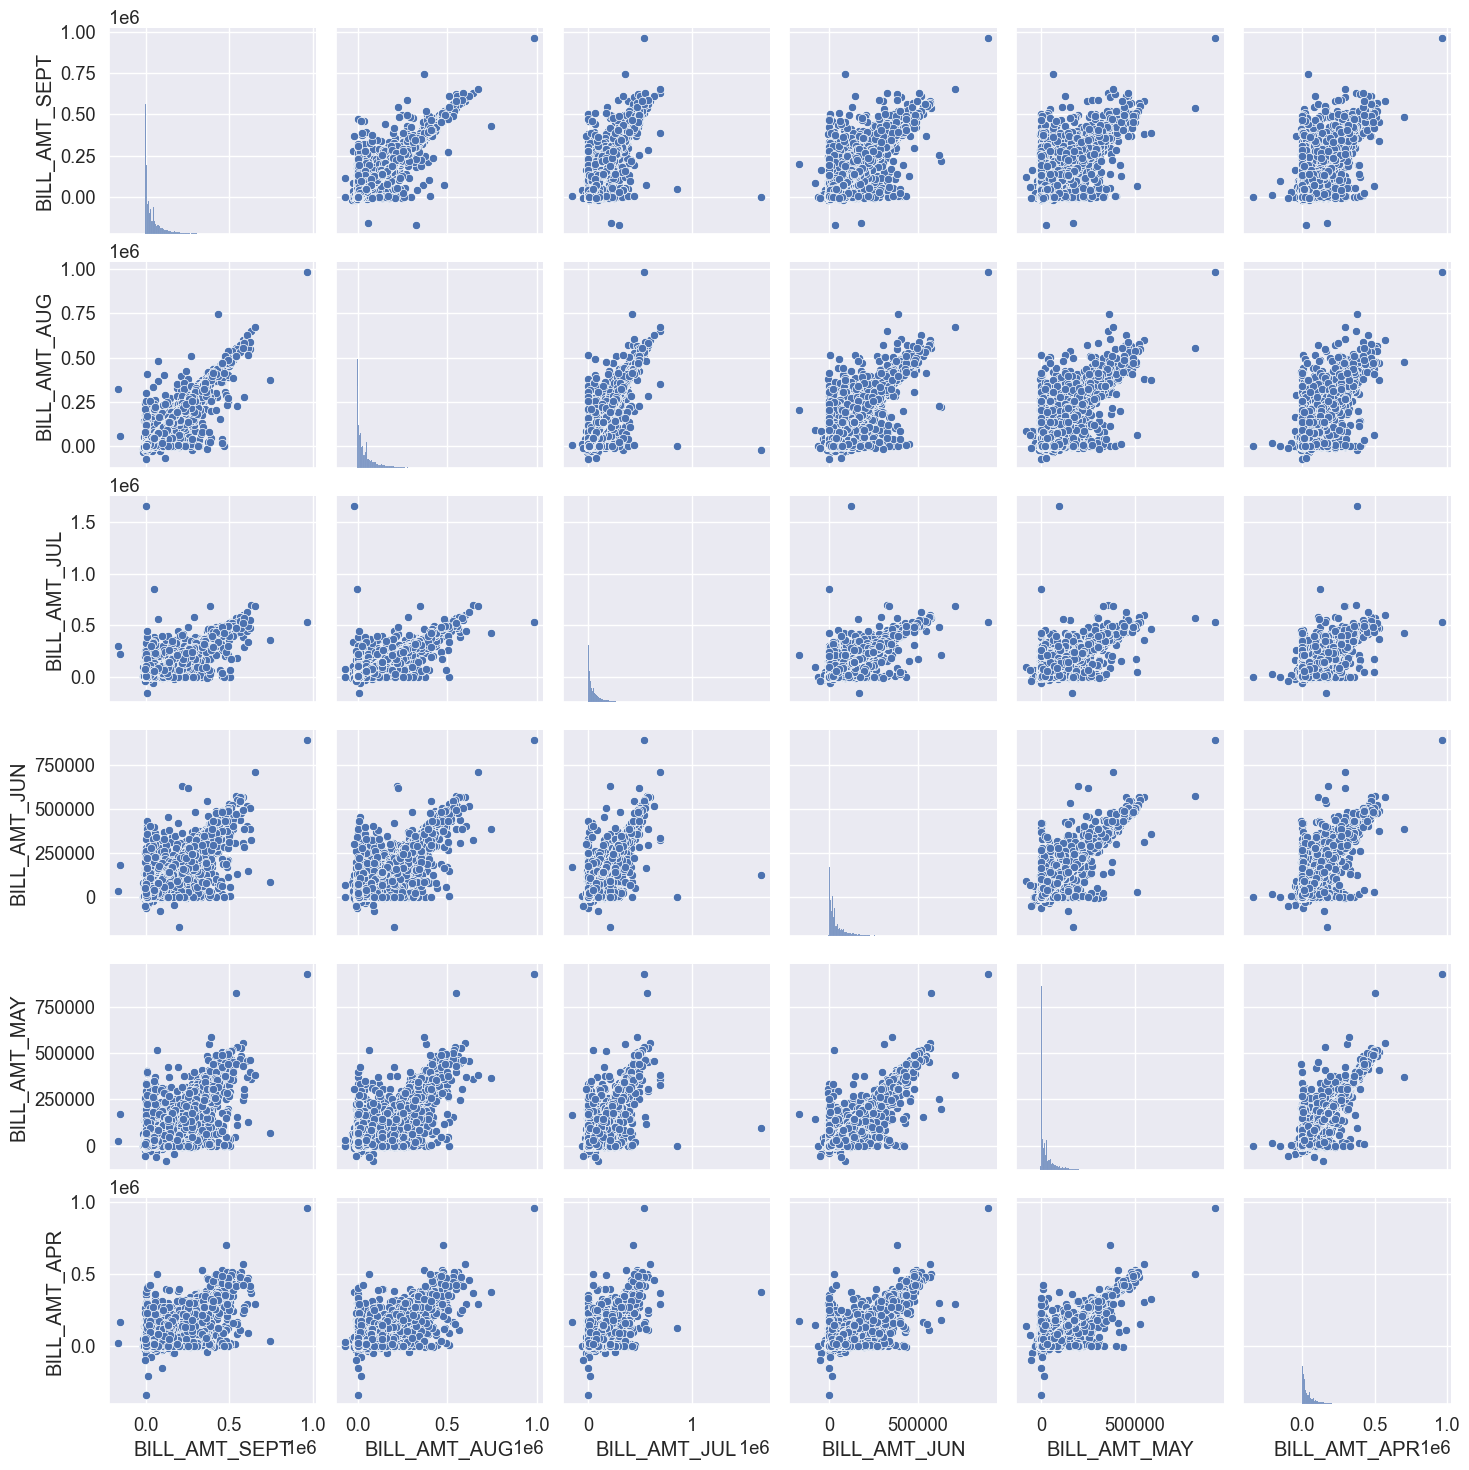

In [64]:
sns.pairplot(data = bill_amnt_df)

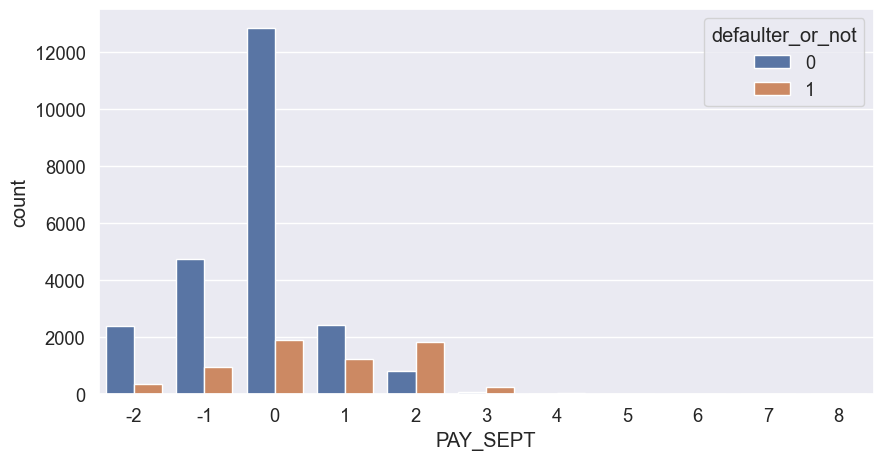

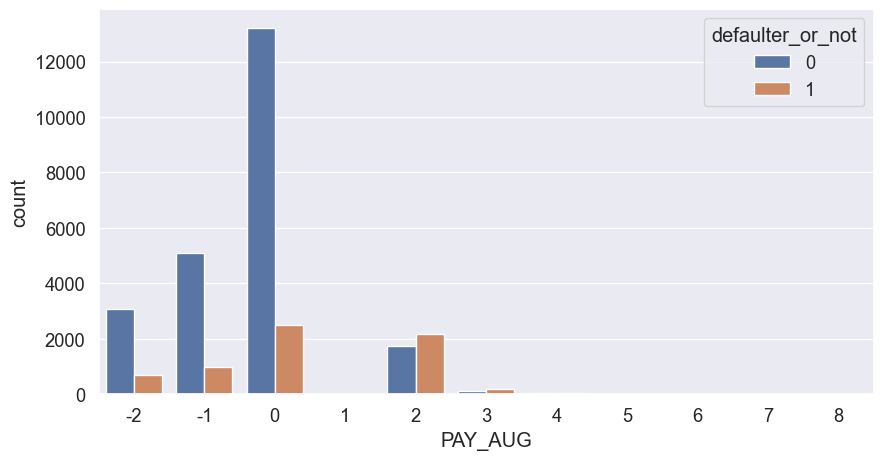

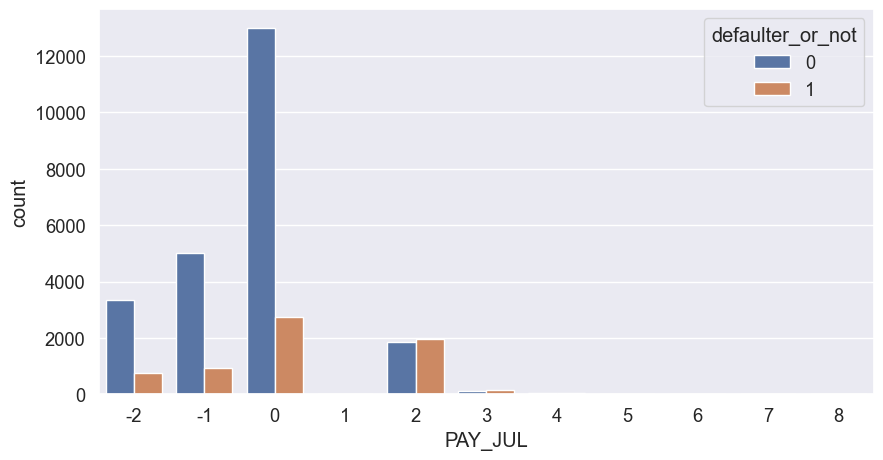

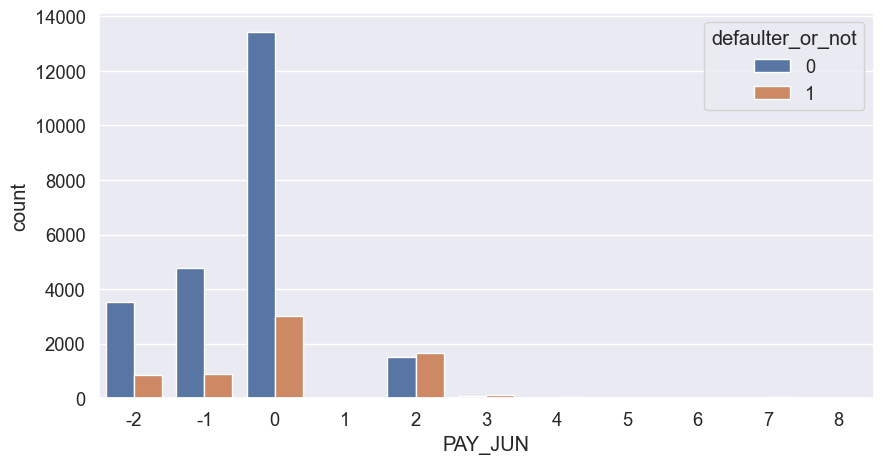

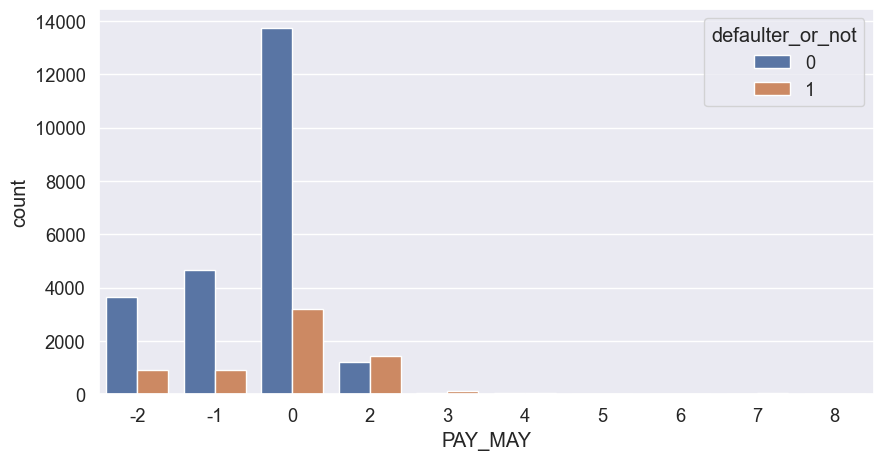

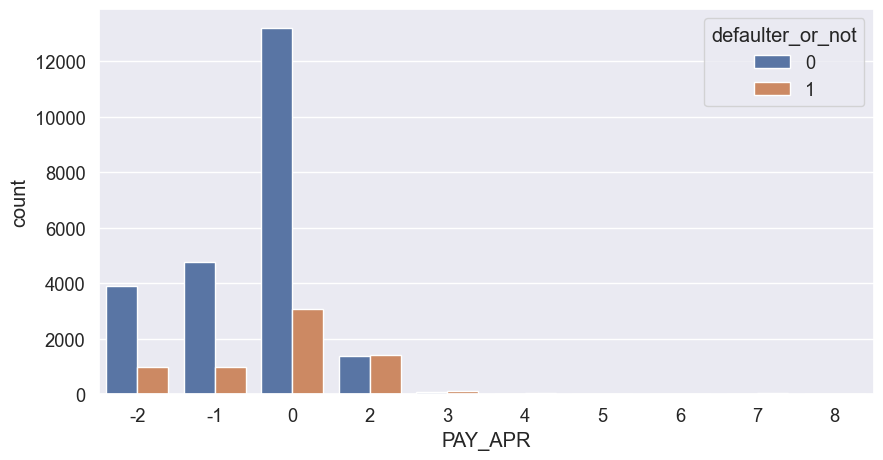

In [65]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'defaulter_or_not', data = df)

In [66]:
pay_amnt_df = df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR', 'defaulter_or_not']]

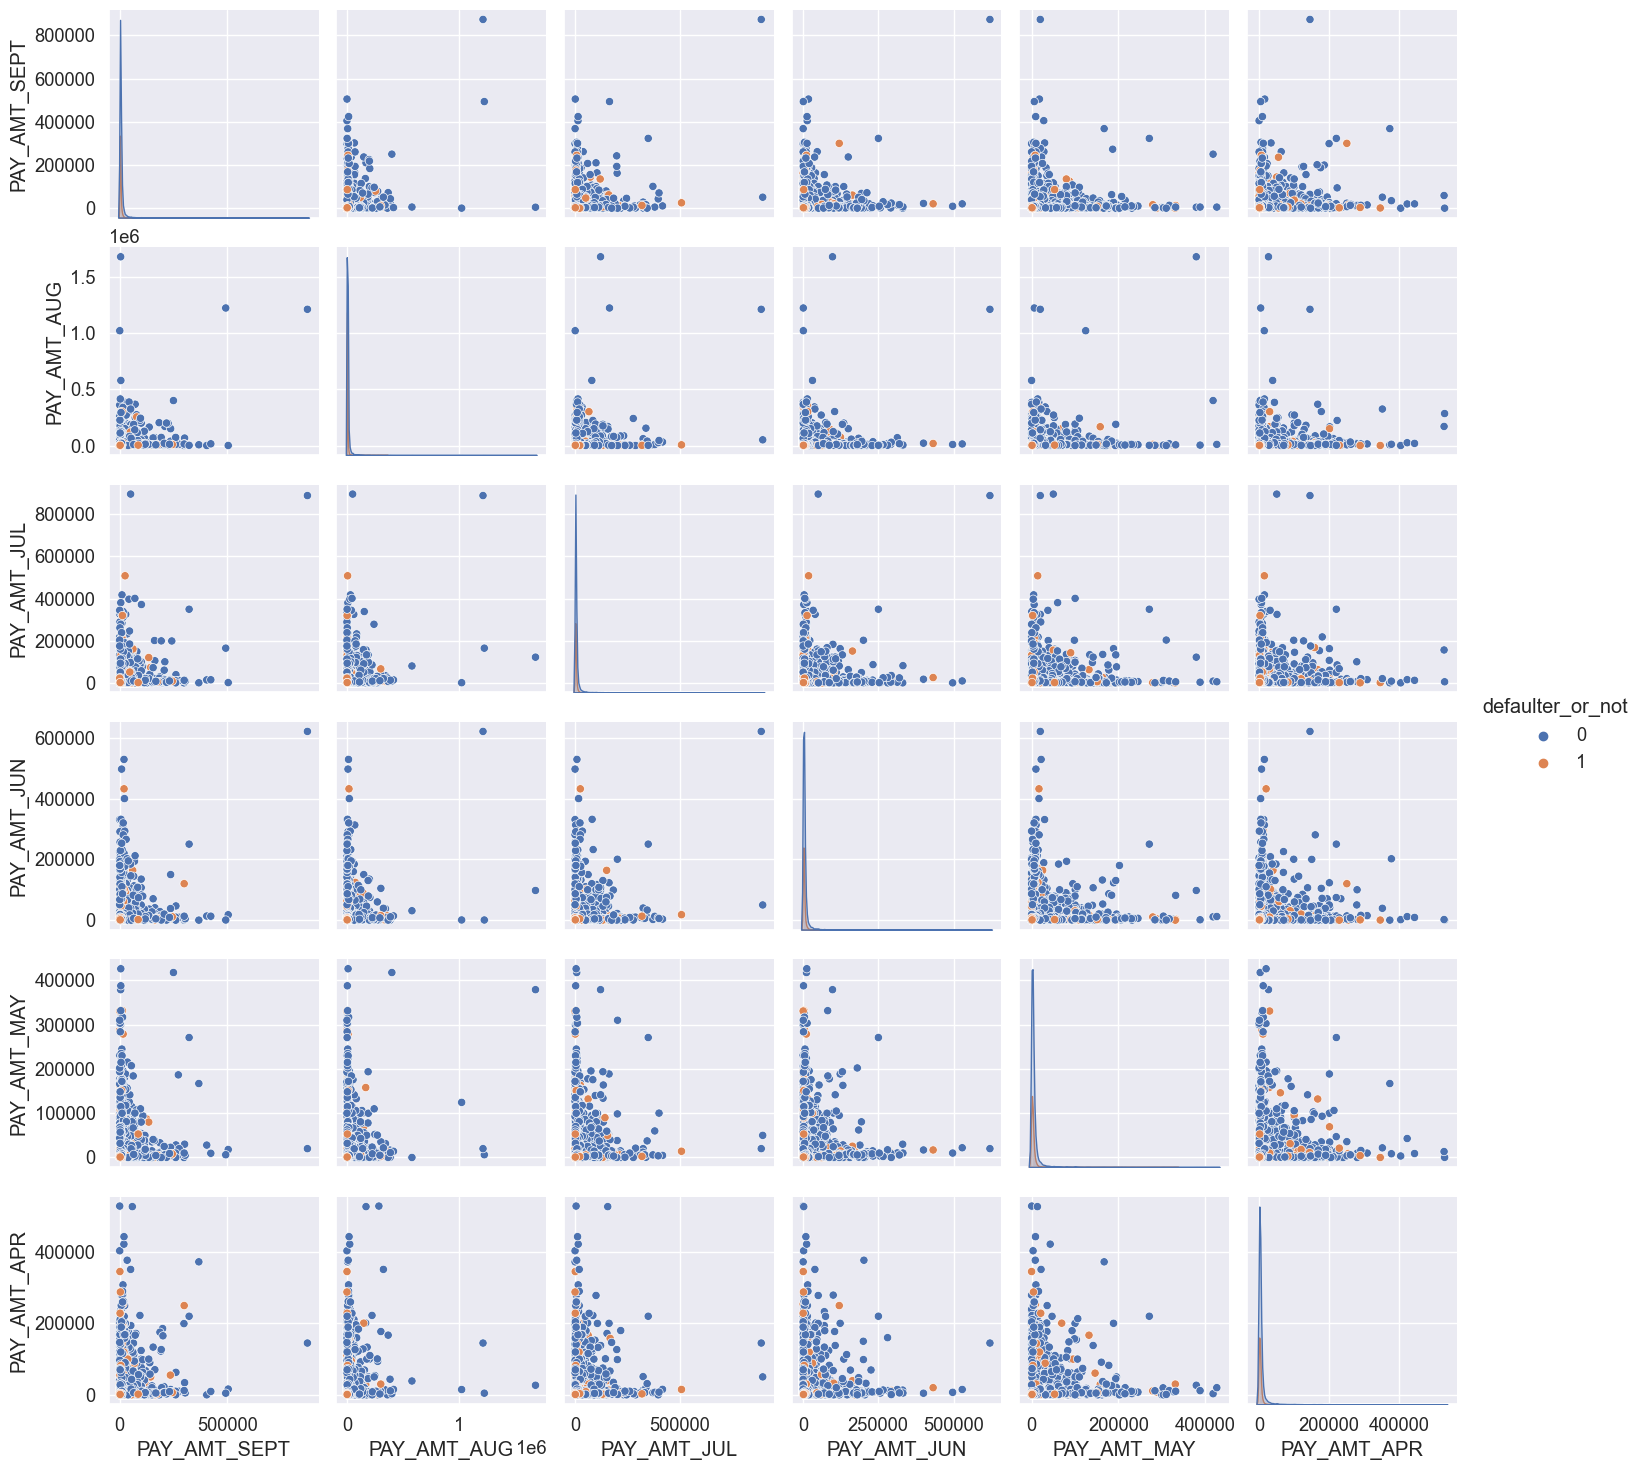

In [67]:
sns.pairplot(data = pay_amnt_df, hue='defaulter_or_not')

In [68]:
df.shape

(30000, 27)

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-3], df['defaulter_or_not'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [70]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000.000000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,-1,2,0,0,0,2,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,-1,0,-1,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,6096,299018.132080,1,1,2,38,0,1,1,1,1,0,170118.539856,173319.202872,172701.785845,178596.886764,171434.615491,174545.734549,7326.161477,2989.510784,9465.453979,2969.670894,6938.842970,6237.121453
46724,8193,137504.277046,1,1,1,52,2,2,2,1,1,2,71068.901655,72735.321894,73053.278449,73028.810981,76436.908083,78154.719893,3399.657836,2101.197573,1774.016279,4749.572295,3124.786148,0.000000
46725,14715,20000.000000,1,1,1,28,1,-2,-2,-2,-2,-1,0.000000,0.000000,0.000000,0.000000,0.000000,546.926546,0.000000,0.000000,0.000000,0.000000,546.926546,0.000000
46726,18633,184685.460049,1,3,1,33,0,0,0,0,0,0,68093.030961,5770.509865,5421.747055,131414.643084,128913.624922,129907.993618,2318.593450,3970.959119,129227.383319,4253.145400,4621.290726,4470.849677


In [71]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: defaulter_or_not, Length: 46728, dtype: int64

In [72]:
y = df['defaulter_or_not']
x = x=df.drop(['defaulter_or_not','bin_limit','bin_age'],axis=1)
x.head()

logging.info('Dividing features and target values')

In [73]:
x.dtypes

ID                 int64
LIMIT_BAL        float64
SEX                int64
EDUCATION          int64
MARRIAGE           int64
AGE                int64
PAY_SEPT           int64
PAY_AUG            int64
PAY_JUL            int64
PAY_JUN            int64
PAY_MAY            int64
PAY_APR            int64
BILL_AMT_SEPT    float64
BILL_AMT_AUG     float64
BILL_AMT_JUL     float64
BILL_AMT_JUN     float64
BILL_AMT_MAY     float64
BILL_AMT_APR     float64
PAY_AMT_SEPT     float64
PAY_AMT_AUG      float64
PAY_AMT_JUL      float64
PAY_AMT_JUN      float64
PAY_AMT_MAY      float64
PAY_AMT_APR      float64
dtype: object

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y.values, train_size=0.80, random_state=10)

logging.info('Dataset Split')

In [75]:
from sklearn.pipeline import Pipeline
#pipeline_lr = Pipeline([('model', LogisticRegression(max_iter=5000))])
pipeline_svc = Pipeline([('svc_model', SVC())])
pipeline_dc = Pipeline([('dc_model', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_model', RandomForestClassifier())])
pipeline_nb = Pipeline([('guass_model', GaussianNB())])
pipeline_xg = Pipeline([('xgboost', XGBClassifier())])


logging.info('Pipeline created for all models')

In [76]:
models = {
    #'logistic_regression' : pipeline_lr,
    'SVM' : pipeline_svc,
    'Decision Tree' : pipeline_dc,
    'Random Forest' : pipeline_rf,
    'Naive Bayes' : pipeline_nb,
    'XGBoost' : pipeline_xg
}

def model_prediction(name, model):
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=2, pos_label=1, average='weighted', zero_division=1)
        auc = roc_auc_score(ytest, ypred)
        accuracy = accuracy_score(ytest, ypred)
        print(f"Model name : {name}")
        print(f"Accuracy is: {accuracy:.2f}")
        print(f"Precision is: {precision:.2f}")
        print(f"Recall is: {recall:.2f}")
        print(f"Fscore is: {f_beta:.2f}")
        print(f"AUC is: {auc:.2f}\n")
        
for name, model in models.items():
    model_prediction(name, model)
    logging.info('Function model_prediction called for model fit and metrics assessment')

Model name : SVM
Accuracy is: 0.78
Precision is: 0.83
Recall is: 0.78
Fscore is: 0.74
AUC is: 0.50

Model name : Decision Tree
Accuracy is: 0.72
Precision is: 0.73
Recall is: 0.72
Fscore is: 0.73
AUC is: 0.62

Model name : Random Forest
Accuracy is: 0.82
Precision is: 0.80
Recall is: 0.82
Fscore is: 0.81
AUC is: 0.66

Model name : Naive Bayes
Accuracy is: 0.38
Precision is: 0.73
Recall is: 0.38
Fscore is: 0.35
AUC is: 0.55

Model name : XGBoost
Accuracy is: 0.82
Precision is: 0.80
Recall is: 0.82
Fscore is: 0.81
AUC is: 0.66



In [77]:
pickle.dump(pipeline_xg, open('credit_card_default.pkl','wb'))

logging.info('model exported as credit_default.pkl file')